# OVERVIEW - LENA Foundation inspired audio project

## Count spoken words in audio clips

Given an audio clip, we want to count the number of spoken words it contains. 
There are paremeters used to split audio clips at "silences" which we intend to optimize.
We will use machine learning models to see if there are any features which effect the accuracy of our counter (for example, if our counter more accurate for females than males, we will account for that).

Later, we want to make a model which can associate word counts with people 
(e.g. 100 words by child, 300 words by mother, 500 words by teacher in a specific day). 





>### Most helpful link:

>*Split audio files using silence detection - StackOverflow*
<br>
>*https://stackoverflow.com/questions/45526996/split-audio-files-using-silence-detection*



>>### Other links to consider:

>>*Audio signal split at word level boundary - StackOverflow*
<br>
*https://stackoverflow.com/questions/64153590/audio-signal-split-at-word-level-boundary*

>>*Split speech audio file on words in python - StackOverflow*
<br>
*https://stackoverflow.com/questions/36458214/split-speech-audio-file-on-words-in-python*

>>*Using pyDub to chop up a long audio file - StackOverflow*
<br>
*https://stackoverflow.com/questions/23730796/using-pydub-to-chop-up-a-long-audio-file*


### Data source: 

*common-voice2 - Kaggle*
<br>
*https://www.kaggle.com/datasets/danielgraham1997/commonvoice2*

## Libraries and functions

Import the AudioSegment class for processing audio and the 
split_on_silence function for separating out the silent dips in the audio.



>*Split audio files using silence detection - StackOverflow* 
<br>
*https://stackoverflow.com/questions/45526996/split-audio-files-using-silence-detection*

In [1]:
import pydub
from pydub import AudioSegment
from pydub.silence import split_on_silence

Ability to display audio players within notebook.


>*How to insert Audio File in Jupyter Notebook Python - YouTube*
<br>
*https://www.youtube.com/watch?v=2RhvasAXxH4*

In [2]:
import IPython

### Optimized CountWordsAudio function

In [3]:
from ipynb.fs.full.Imports_and_Functions import *

def CountWordsAudio(in_aud, in_msl=15, in_st=-2, in_targ=15):
    return len(split_on_silence(match_target_amplitude(in_aud,in_targ), min_silence_len = in_msl, silence_thresh = in_st))

## Local directories and data

Display the directory paths so we can see where the folders containing our data are.
E.g. folder "commonvoice" contains folders "test", "train", and "validation".



>*Getting a list of all subdirectories in the current directory - StackOverflow*
<br>
*https://stackoverflow.com/questions/973473/getting-a-list-of-all-subdirectories-in-the-current-directory*

>*How to iterate over files in directory using Python - StackOverflow*
<br>
*https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/*

In [4]:
# Remove unwanted items from a list.
# E.g. remove_items( [1,2,2,3,3,3] , 2 ) outputs [1,3,3,3].
def remove_items(test_list, item):
    res = [i for i in test_list if i != item] # Using list comprehension to perform the task.
    return res

# Create a folder directory tree.
def OrganizeDirectory(in_list,in_main_dir=r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project'):
    out_list = in_list.copy()
    for i in range(len(out_list)-1):
        if out_list[i] in out_list[i+1]:
            out_list[i] = 0
        else:
            pass
    out_list = remove_items(out_list,0)
    for i in range(len(out_list)):
        out_list[i] = out_list[i][len(in_main_dir):]
    return out_list

# Simply print all of the items in a list.
def Display(in_list):
    for i in in_list:
        print(i)
    return in_list

In [5]:
# Be sure to UPDATE with your USER
dir_path = r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project'


os.walk(dir_path)
dir_list = [x[0] for x in os.walk(dir_path)]
dir_list = [x for x in dir_list if '.git' not in x] # There are a lot of uneccessary hidden folders to remove
Display(OrganizeDirectory(dir_list))


TR_dir = r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\train\clips'
TR_aud = os.listdir(TR_dir)
TE_dir = r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\test\clips'
TE_aud = os.listdir(TE_dir)
VA_dir = r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\validation\clips'
VA_aud = os.listdir(VA_dir)

TR_df = pd.read_csv(r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\train\train1.csv', 
                    sep='\t', 
                    lineterminator='\r')
TE_df = pd.read_csv(r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\test\test1.csv', 
                    sep='\t', 
                    lineterminator='\r')
VA_df = pd.read_csv(r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\validation\validation1.csv', 
                    sep='\t', 
                    lineterminator='\r')

\.ipynb_checkpoints
\commonvoice\test\clips
\commonvoice\train\clips
\commonvoice\validation\clips
\FunctionsGraphics
\Plots


<br>

## EDA (EXPLORATORY DATA ANALYSIS)

Let's make our model more precise.
To do this, let's simply try out different values for msl, st, targ
to see which ones produce the best accuracy.

In [6]:
IPython.display.display(IPython.display.Audio(r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\train\clips\common_voice_en_10110.wav'))
IPython.display.display(IPython.display.Audio(r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\train\clips\common_voice_en_10153.wav'))
IPython.display.display(IPython.display.Audio(r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\train\clips\common_voice_en_101622.wav'))
IPython.display.display(IPython.display.Audio(r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\train\clips\common_voice_en_10187.wav'))
IPython.display.display(IPython.display.Audio(r'C:\Users\kitsu\Documents\GitHub\Erdos_2022_05_Audio_Project\commonvoice\train\clips\common_voice_en_10199.wav'))


print('\n')
TR_df.head()

client_id                    path  \
0  \nac5fea9cacdfa4a2d6291c780b0a0ee1c0f2c5d2389c...   common_voice_en_10110   
1  \nac5fea9cacdfa4a2d6291c780b0a0ee1c0f2c5d2389c...   common_voice_en_10153   
2  \n0e7bca7f3243636599bd8e7bbe03b4f09ae8898bb0e1...  common_voice_en_101622   
3  \nac5fea9cacdfa4a2d6291c780b0a0ee1c0f2c5d2389c...   common_voice_en_10187   
4  \nac5fea9cacdfa4a2d6291c780b0a0ee1c0f2c5d2389c...   common_voice_en_10199   

                                            sentence  up_votes  down_votes  \
0          I really liked the film we saw last week.       4.0         0.0   
1  Please put maimi yajima's song onto Operación ...       3.0         0.0   
2         Three men are painting a metal wall white.       3.0         0.0   
3  Though this be madness, yet there is method in it       4.0         0.0   
4  As she watched, the cat washed his ears and th...       4.0         0.0   

        age gender  accent  
0   sixties   male      us  
1   sixties   male      us  
2  twenties   male  indian  
3   sixties   male      us  
4   sixties   male      us

### Quick test

In [7]:
for song in range(len(TR_aud[:5])):
    print(CountWordsAudio(AudioSegment.from_wav(TR_dir+'\\'+TR_aud[song])), ' ', TR_df.loc[[song][0]][2], ' ', CountWordsText(TR_df.loc[[song][0]][2]))

4   I really liked the film we saw last week.   9
8   Please put maimi yajima's song onto Operación Bikini.   8
10   Three men are painting a metal wall white.   8
9   Though this be madness, yet there is method in it   10
13   As she watched, the cat washed his ears and then settled down to sleep.   14


<br>

## Machine Learning - Multiple Linear Regression

In [8]:
from ipynb.fs.full.Imports_and_Functions import *

In [9]:
features = ['num_onsets', 'tempo', 'onset_stren_mean',
            'dom_freq', 'sp_centroid_mean', 'sp_flattness_mean',
            'polyfeats_0_mean']

TR_85_df = TR_df.copy()
TR_85_df['median_func_num'] = gm85
TR_85_df = TR_85_df.dropna()

X = TR_85_df[features]
y = TR_85_df['median_func_num']

mlr = linear_model.LinearRegression()
mlr.fit(X, y)

mlr.score(X,y)

# pred_y = mlr.predict([[10, 10, 10, 10, 10, 10, 10]])

0.13408925853120002

### 3D Plot

*https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python*

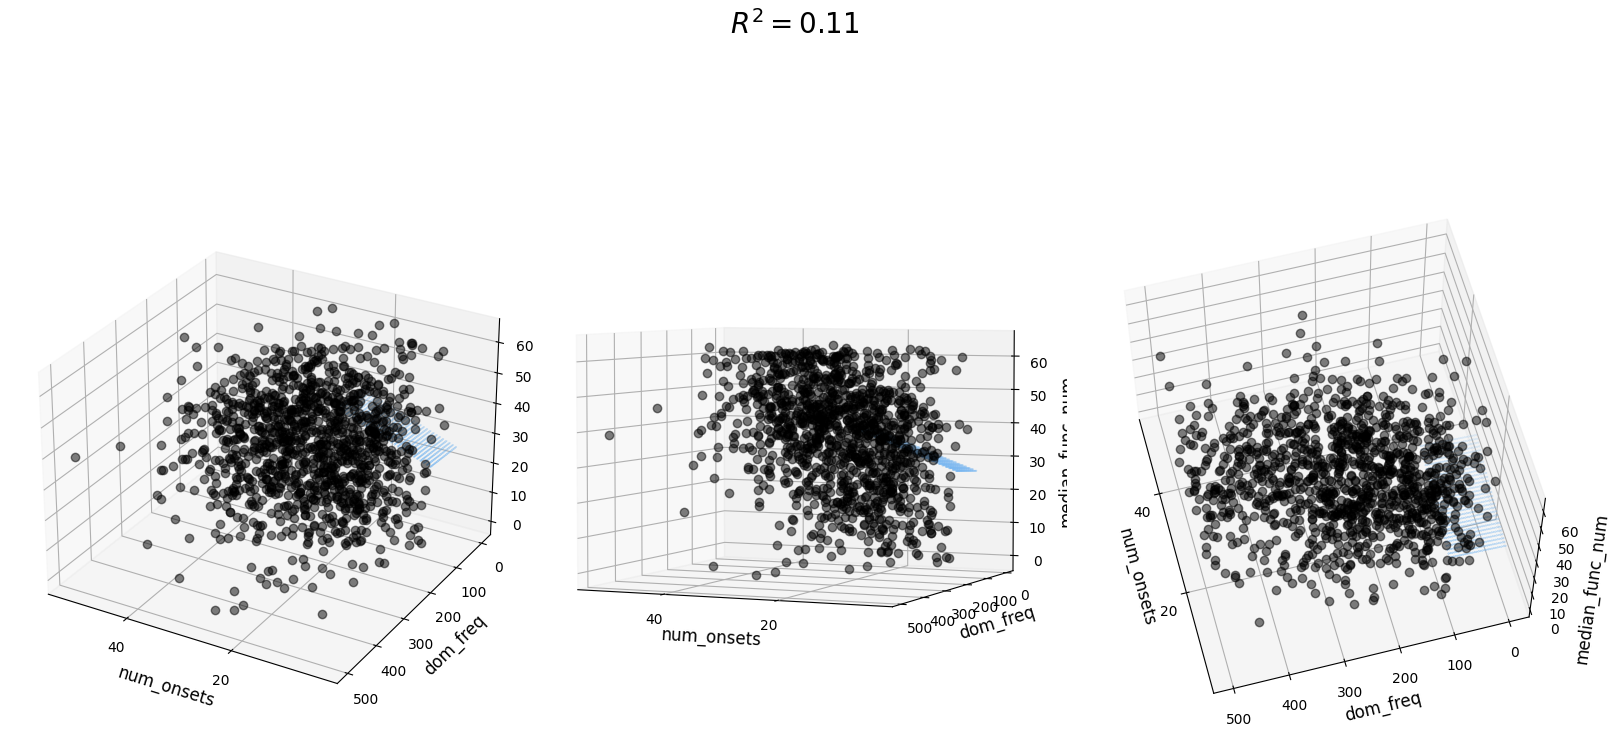

In [10]:
two_feat = ['num_onsets', 'dom_freq']

TR_85_df = TR_df.copy()
TR_85_df['median_func_num'] = gm85
TR_85_df = TR_85_df.dropna()

X = TR_85_df[two_feat].values.reshape(-1,2)
Y = TR_85_df['median_func_num']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=my_figsize)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=my_mark_size, edgecolor='#70b3f0')
    ax.set_xlabel('num_onsets',  fontsize=12)
    ax.set_ylabel('dom_freq', fontsize=12)
    ax.set_zlabel('median_func_num', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

## Finding an optimal list of features

In [11]:
from itertools import combinations

In [12]:
# features = ['tempo_onsets', 'num_onsets', 'onset_detect_len', 'onset_stren_mean',
#             'dom_freq', 'sp_centroid_mean', 'sp_rolloff_mean', 'sp_flattness_mean']
# features = ['tempo_onsets', 'num_onsets', 'tempo', 'onset_detect_len', 'onset_detect_mean_diff', 'onset_stren_mean', 'onset_stren_median',
#             'dom_freq', 'sp_centroid_mean', 'sp_centroid_median', 'sp_rolloff_mean', 'sp_rolloff_median', 'sp_flattness_mean', 'sp_flattness_median',
#             'polyfeats_0_mean', 'polyfeats_1_mean', 'polyfeats_0_median', 'polyfeats_1_median']
features = ['tempo_onsets', 'num_onsets', 'tempo', 'onset_detect_mean_diff', 'onset_stren_mean', 
            'dom_freq', 'sp_centroid_mean', 'sp_rolloff_mean', 'sp_flattness_mean',
            'polyfeats_0_mean', 'polyfeats_1_mean']
want_pred = 'median_func_num'
df = TR_85_df
l = len(features)
R = []
for i in range(l):
    i = i+1
    r = []
    for feats in combinations(features, i):  # 1 for single, 2 for pairs, 3 for triplets, etc.
        # print(feats, "\n")
        X = df[list(feats)].values.reshape(-1,i)
        Y = df[want_pred]
        ols = linear_model.LinearRegression()
        model = ols.fit(X, Y)
        r.append(model.score(X, Y))
        rc = r.copy()
    R.append(rc)

In [13]:
Mr = []
for i in range(l):
    Mr.append(max(R[i]))
Display(Mr)
print('\n')
M = max(Mr)
print(Mr.index(M),': ', M)

0.10116449285775364
0.11772969256223009
0.13164979081296413
0.13275922977174082
0.13367556341132925
0.13413095550329213
0.1344907389595349
0.13480707215175802
0.1348502040125532
0.13486395706122745
0.13486395706122745


9 :  0.13486395706122745


There's a best pair; let's find it!

In [14]:
ind1 = R[0].index(Mr[0])
ind2 = R[1].index(Mr[1])
ind3 = R[2].index(Mr[2])

lst1 = list(combinations(features, 1))
lst2 = list(combinations(features, 2))
lst3 = list(combinations(features, 3))

Best_1 = lst1[ind1]
Best_2 = lst2[ind2]
Best_3 = lst3[ind3]

print(Best_1, Best_2, Best_3, sep='\n')

('num_onsets',)
('num_onsets', 'onset_stren_mean')
('num_onsets', 'onset_stren_mean', 'dom_freq')


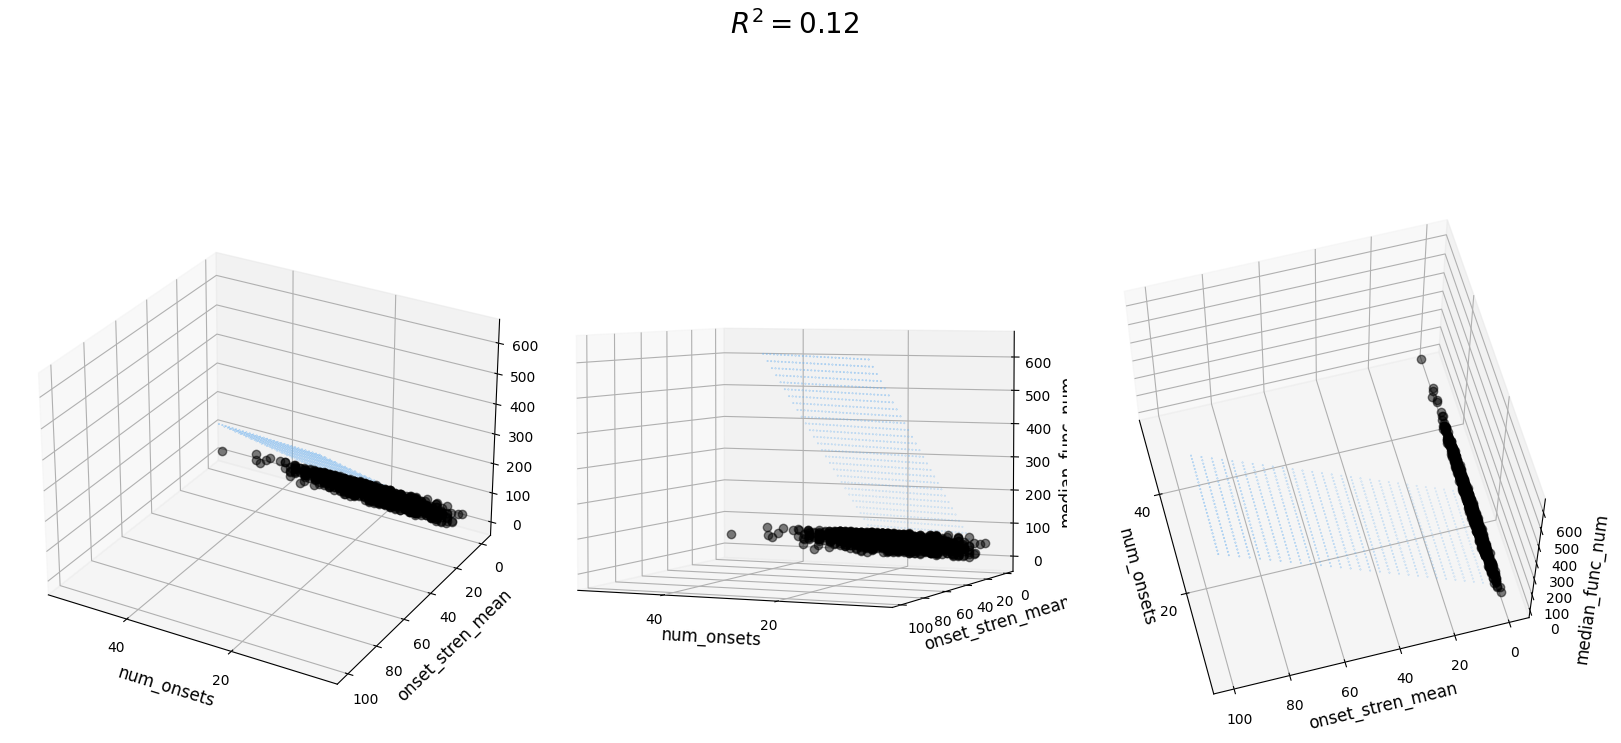

In [15]:
two_feat = ['num_onsets', 'onset_stren_mean']
want_pred = 'median_func_num'

TR_85_df = TR_df.copy()
TR_85_df[want_pred] = gm85
TR_85_df = TR_85_df.dropna()

X = TR_85_df[two_feat].values.reshape(-1,2)
Y = TR_85_df[want_pred]

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=my_figsize)

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=my_mark_size, edgecolor='#70b3f0')
    ax.set_xlabel(two_feat[0],  fontsize=12)
    ax.set_ylabel(two_feat[1], fontsize=12)
    ax.set_zlabel(want_pred, fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

<br>

## VALIDATION

('num_onsets',)
<br>
('num_onsets', 'onset_stren_mean')
<br>
('num_onsets', 'onset_stren_mean', 'dom_freq')



In [16]:
TTV = ['train', 'test', 'validation']
main_dir = 'commonvoice'
data_ext = '.tsv'
data_sep = '\t'
aud_ext = '.wav'
clips = 'clips\\'

TR_dir = main_dir + '\\' + TTV[0] + '\\'
TE_dir = main_dir + '\\' + TTV[1] + '\\'
VA_dir = main_dir + '\\' + TTV[2] + '\\'

TR_dir_clips = TR_dir + clips
TE_dir_clips = TE_dir + clips
VA_dir_clips = VA_dir + clips

TR_df = pd.read_csv(main_dir + '\\' + TTV[0] + '\\' + TTV[0] + data_ext, sep= data_sep)
TE_df = pd.read_csv(main_dir + '\\' + TTV[1] + '\\' + TTV[1] + data_ext, sep= data_sep)
VA_df = pd.read_csv(main_dir + '\\' + TTV[2] + '\\' + TTV[2] + data_ext, sep= data_sep)

TTV_dir = [TR_dir, TE_dir, VA_dir]
TTV_dir_clips = [TR_dir_clips, TE_dir_clips, VA_dir_clips]
TTV_df = [TR_df, TE_df, VA_df]


### Localize
temp_dir_clips = TR_dir_clips
temp_df = TR_df
temp_df1 = TE_df
temp_df2 = VA_df
temp_list_df = TTV_df
temp_aud_ext = aud_ext

In [17]:
TR_MED_df = pd.read_csv(TTV[0][0:2].upper() + '_MED_df' + data_ext, sep=data_sep)
TE_MED_df = pd.read_csv(TTV[1][0:2].upper() + '_MED_df' + data_ext, sep=data_sep)
VA_MED_df = pd.read_csv(TTV[2][0:2].upper() + '_MED_df' + data_ext, sep=data_sep)

features = ['age_num', 'gender', 'accent', 
            'num_onsets', 'onset_stren_mean', 'dom_freq']
feats = features.copy()
feat = ['num_onsets']
two_feat = ['num_onsets', 'onset_stren_mean']
cats = ['age_num', 'gender', 'accent']
quants = ['num_onsets', 'onset_stren_mean', 'dom_freq']
want_pred = 'MEDIAN_func_num'

### a.  3D

In [18]:
features = two_feat.copy()
X = TR_MED_df[features].copy()
y = TR_MED_df[want_pred].copy()

percentage = 0.80
l = len(VA_MED_df[want_pred].iloc[:].to_list())
perci = int(l*percentage)

X_val = VA_MED_df[features].copy()
X_val_TR = VA_MED_df[features].copy().iloc[:perci,:]
X_val_VA = VA_MED_df[features].copy().iloc[perci:,:]

y_val = VA_MED_df[want_pred].copy()
y_val_TR = VA_MED_df[want_pred].iloc[:perci]
y_val_VA = VA_MED_df[want_pred].iloc[perci:]


# Local model
model = linear_model.LinearRegression()


# General
model.fit(X,y)
score = model.score(X,y)
pred = model.predict(VA_MED_df[features])
print('Model score:', score)
print("Validation MSE:", 
      mean_squared_error(VA_MED_df[want_pred], pred), '\n'*2)

# BASELINES

# Baseline 1 - msl = 15, st = -2, targ = 15
pred = list(map(CountWordsAudio_apply, VA_MED_df['aud_path']))
for i in range(len(pred)):
    pred[i] = pred[i] / VA_MED_df['num_words'][i]
print('Validation MSE of baseline "msl=15, st=-2, targ=15":', 
      mean_squared_error(y_val, pred), '\n')

# Baseline 2 - Average
pred = [st.mean(y_val)]*l
print('Validation MSE of baseline "Average":', 
      mean_squared_error(y_val, pred), '\n')

# Baseline 3 - Trend
mlr = LinearRegression()
mlr.fit(X_val_TR, y_val_TR)
pred = mlr.predict(X_val_VA)
score = mlr.score(X_val_VA, y_val_VA)
print('Model score of baseline "Trend":', score)
print('Validation MSE of baseline: "Trend"', 
      mean_squared_error(y_val_VA, pred), '\n')

Model score: 0.10092409179250594
Validation MSE: 328.8271170178382 


Validation MSE of baseline "msl=15, st=-2, targ=15": 1512.8667230214417 

Validation MSE of baseline "Average": 374.549375 

Model score of baseline "Trend": -0.057744034161325564
Validation MSE of baseline: "Trend" 280.1922628367017 



### b. 4D

In [19]:
features = quants.copy()
X = TR_MED_df[features].copy()
y = TR_MED_df[want_pred].copy()

percentage = 0.80
l = len(VA_MED_df[want_pred].iloc[:].to_list())
perci = int(l*percentage)

X_val = VA_MED_df[features].copy()
X_val_TR = VA_MED_df[features].copy().iloc[:perci,:]
X_val_VA = VA_MED_df[features].copy().iloc[perci:,:]

y_val = VA_MED_df[want_pred].copy()
y_val_TR = VA_MED_df[want_pred].iloc[:perci]
y_val_VA = VA_MED_df[want_pred].iloc[perci:]


# Local model
model = linear_model.LinearRegression()


# General
model.fit(X,y)
score = model.score(X,y)
pred = model.predict(VA_MED_df[features])
print('Model score:', score)
print("Validation MSE:", 
      mean_squared_error(VA_MED_df[want_pred], pred), '\n'*2)

# BASELINES

# Baseline 1 - msl = 15, st = -2, targ = 15
pred = list(map(CountWordsAudio_apply, VA_MED_df['aud_path']))
for i in range(len(pred)):
    pred[i] = pred[i] / VA_MED_df['num_words'][i]
print('Validation MSE of baseline "msl=15, st=-2, targ=15":', 
      mean_squared_error(y_val, pred), '\n')

# Baseline 2 - Average
pred = [st.mean(y_val)]*l
print('Validation MSE of baseline "Average":', 
      mean_squared_error(y_val, pred), '\n')

# Baseline 3 - Trend
mlr = LinearRegression()
mlr.fit(X_val_TR, y_val_TR)
pred = mlr.predict(X_val_VA)
score = mlr.score(X_val_VA, y_val_VA)
print('Model score of baseline "Trend":', score)
print('Validation MSE of baseline: "Trend"', 
      mean_squared_error(y_val_VA, pred), '\n')

Model score: 0.10714123172971535
Validation MSE: 326.9903387148712 


Validation MSE of baseline "msl=15, st=-2, targ=15": 1512.8667230214417 

Validation MSE of baseline "Average": 374.549375 

Model score of baseline "Trend": -0.08409017792176687
Validation MSE of baseline: "Trend" 287.17125340421853 



<br>

## How much better are we doing?

In [20]:
TR_df = pd.read_csv('TR_MED_df.tsv', sep='\t')

TR_df['pred_y'] = y
Y = []
for i in range(len(y)):
    n = 13+y[i]
    Y.append(TR_df.iloc[i,n])
TR_df['count_pred_func'] = Y

TR_df.sample(10, random_state=9)[['num_words','sentence','count_15_n-2_15', 'count_pred_func']]

num_words                                           sentence  \
207          14  A small child playing with a toy oven in a moc...   
756          11  They have adapted traditional Yolngu dance per...   
289          15  Egg yolk comes out of an egg after the egg is ...   
1692          8         The average erosion of bluffs is per year.   
866          10  Government signs now warn against trespassing ...   
1937         13  During his tenure with "Digital Review", Shann...   
785           8         It is meant to represent a radiating atom.   
445          10  Does anybody use their garage for keeping a ca...   
1335         12  Colonial Caribbean ancestors were predominantl...   
130           8            A woman watches a man recieving a gift.   

      count_15_n-2_15  count_pred_func  
207                16               14  
756                18               16  
289                11               15  
1692               10                8  
866                19               13  
1937               11               13  
785                 6                8  
445                 8               11  
1335               23               17  
130                 4                6

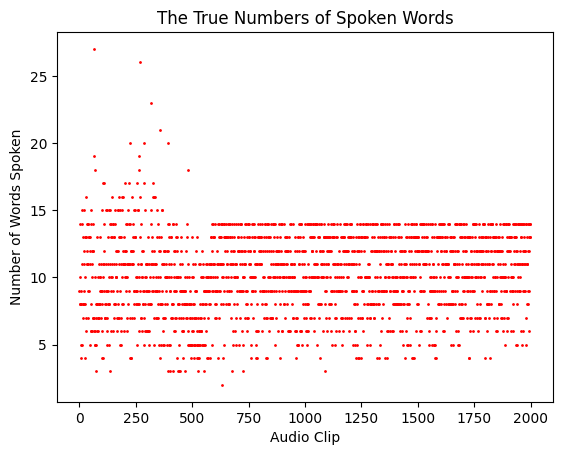

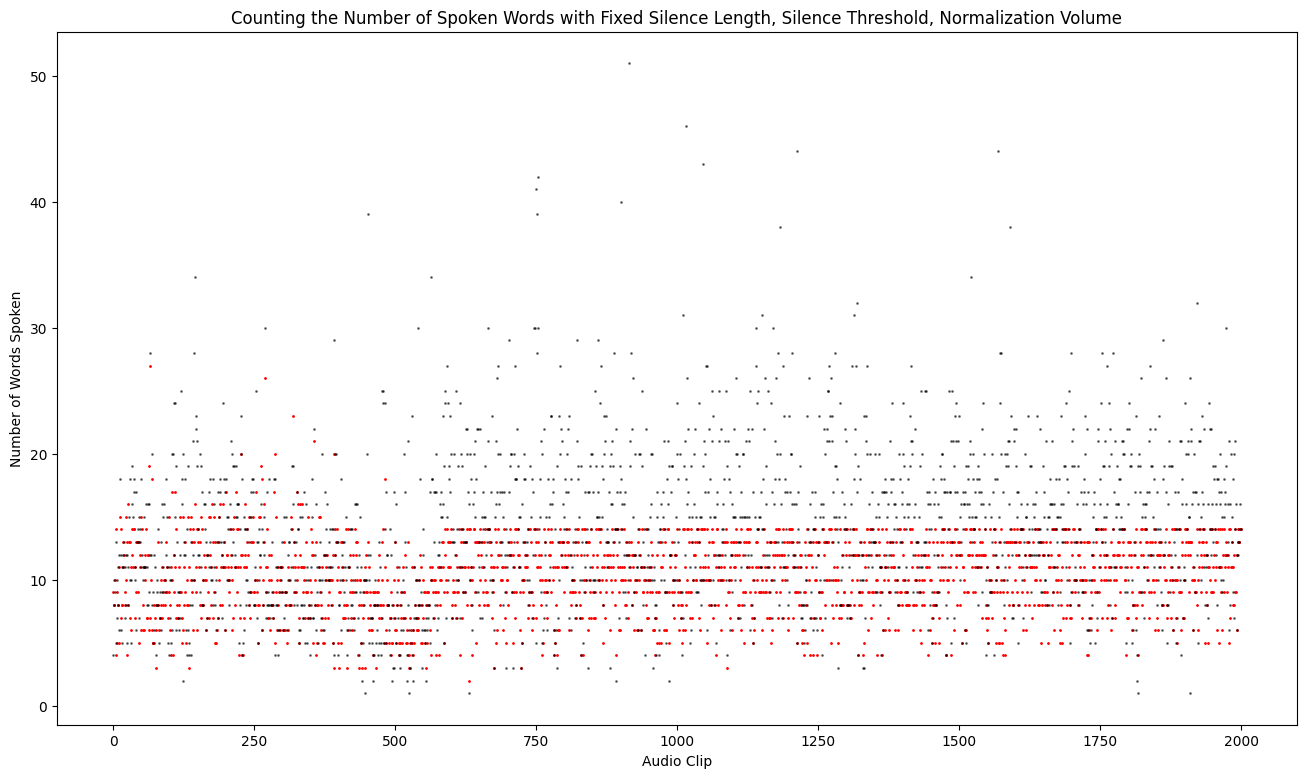

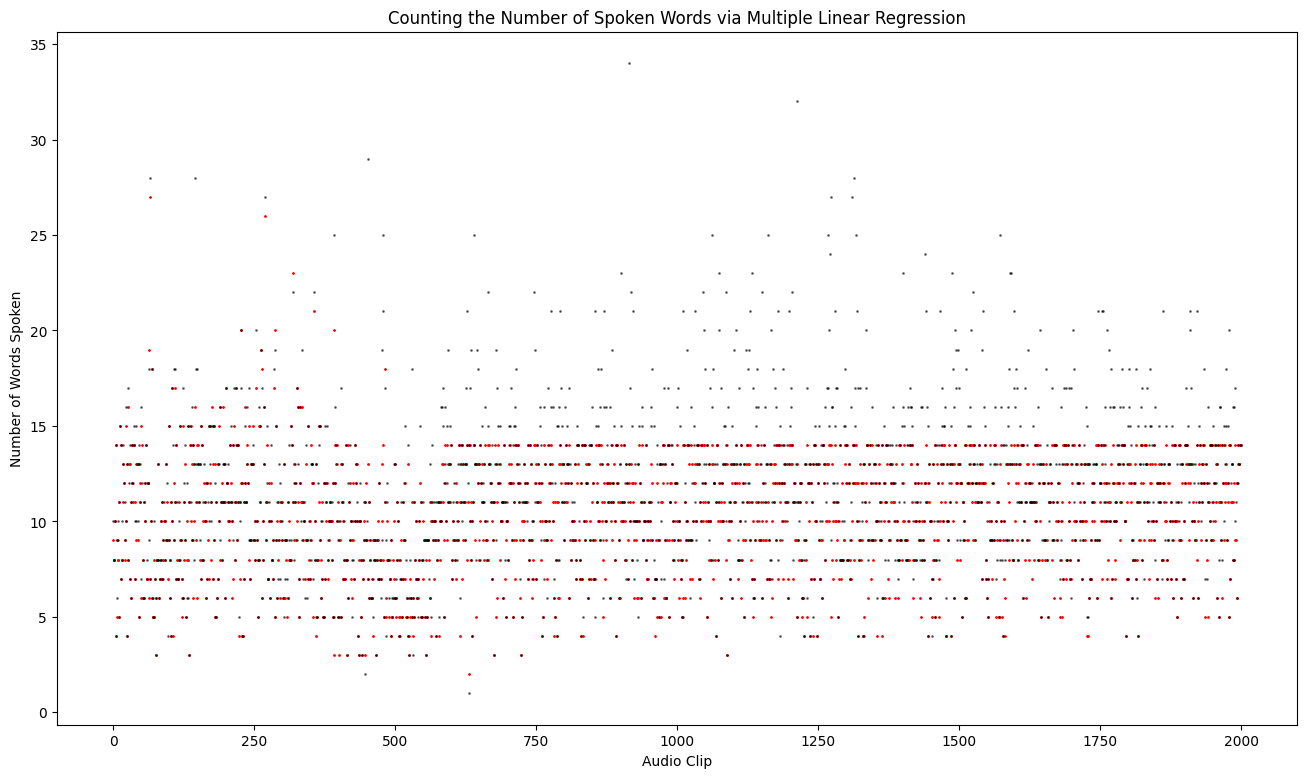

In [21]:
plt.scatter(list(range(2000)), TR_df.loc[:,'num_words'], color='r', s=1, marker='o', alpha=1)

plt.xlabel('Audio Clip')
plt.ylabel('Number of Words Spoken')
plt.title('The True Numbers of Spoken Words')
# plt.axis([0, 2000, 0, 30])
plt.rcParams["figure.figsize"] = my_figsize
plt.show()



plt.scatter(list(range(2000)), TR_df.loc[:,'num_words'], color='r', s=1, marker='o', alpha=1)
plt.scatter(list(range(2000)), TR_df.loc[:,'count_15_n-2_15'], color='k', s=1, marker='o', alpha=.5)

plt.xlabel('Audio Clip')
plt.ylabel('Number of Words Spoken')
plt.title('Counting the Number of Spoken Words with Fixed Silence Length, Silence Threshold, Normalization Volume')
# plt.axis([0, 2000, 0, 30])
plt.rcParams["figure.figsize"] = my_figsize
plt.show()



plt.scatter(list(range(2000)), TR_df.loc[:,'num_words'], color='r', s=1, marker='o', alpha=1)
plt.scatter(list(range(2000)), TR_df.loc[:,'count_pred_func'], color='k', s=1, marker='o', alpha=.5)

plt.xlabel('Audio Clip')
plt.ylabel('Number of Words Spoken')
plt.title('Counting the Number of Spoken Words via Multiple Linear Regression')
# plt.axis([0, 2000, 0, 30])
plt.rcParams["figure.figsize"] = my_figsize
plt.show()

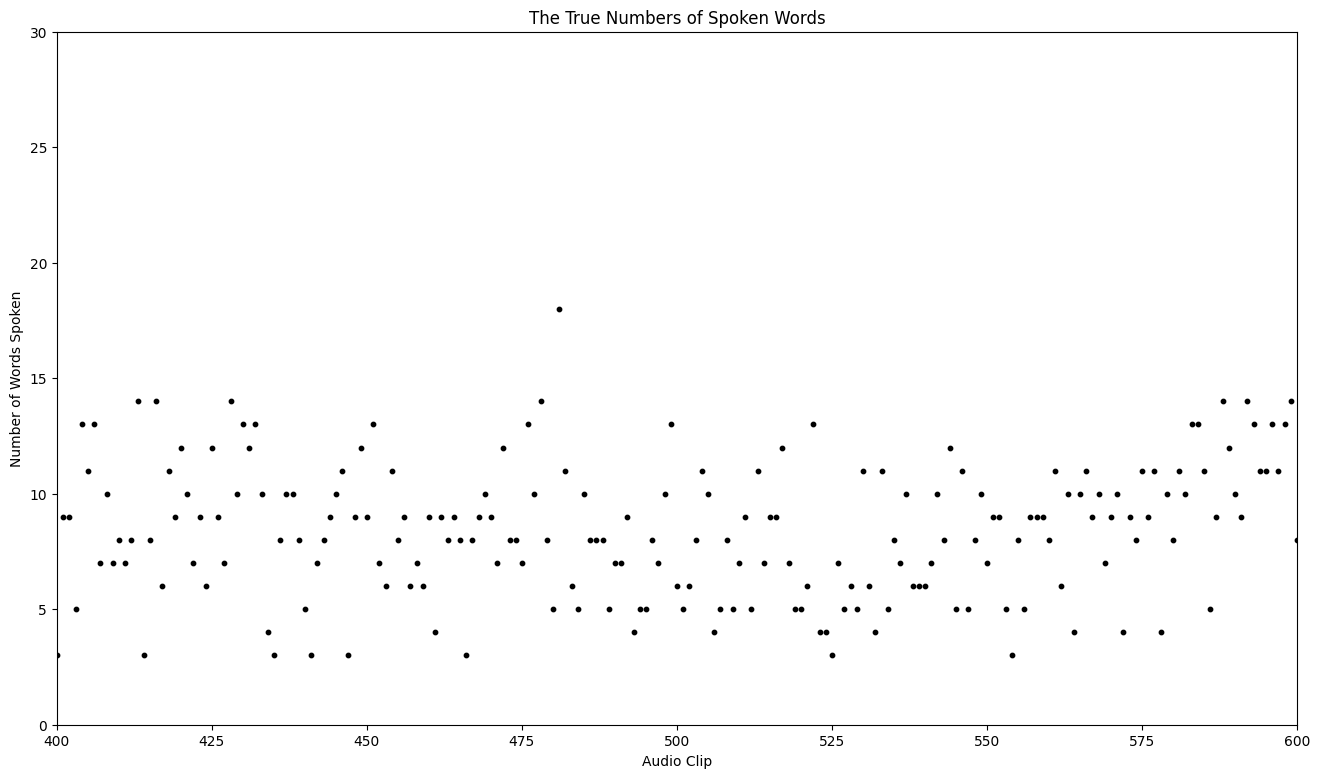

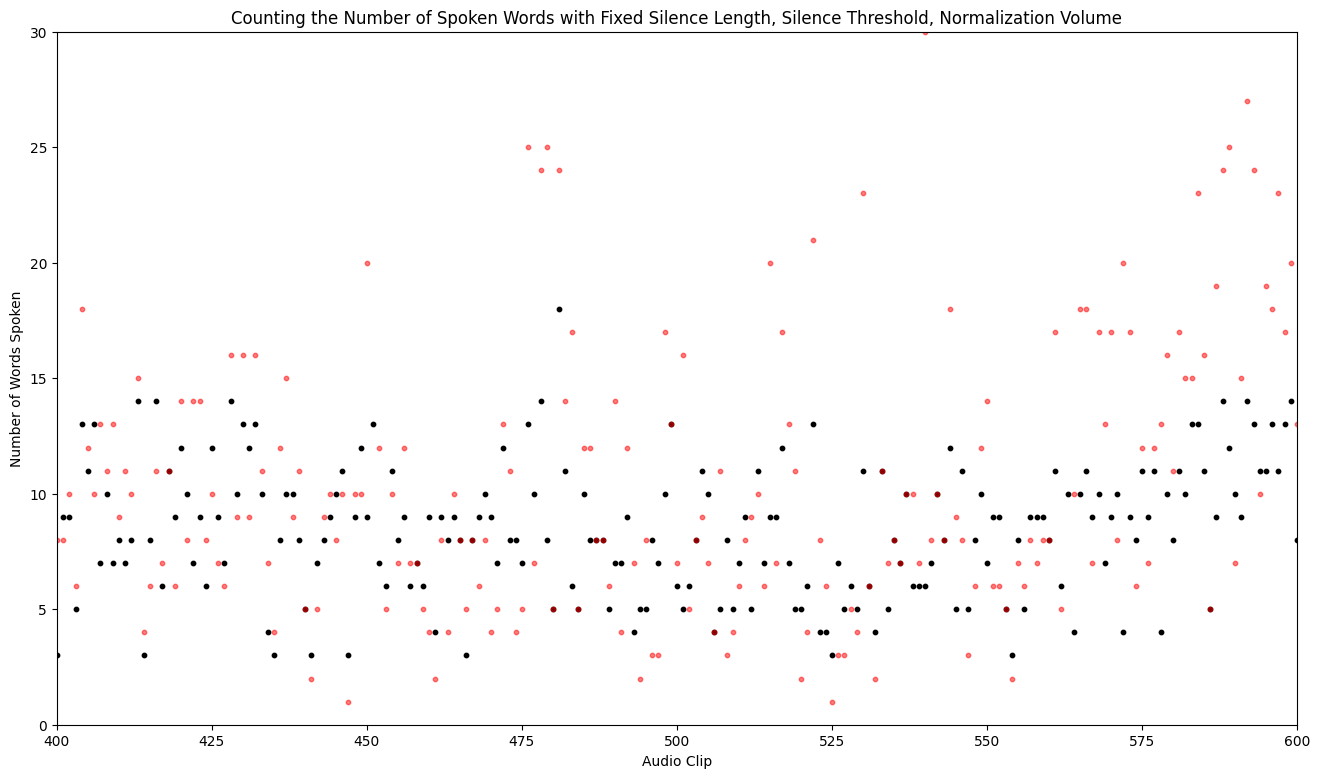

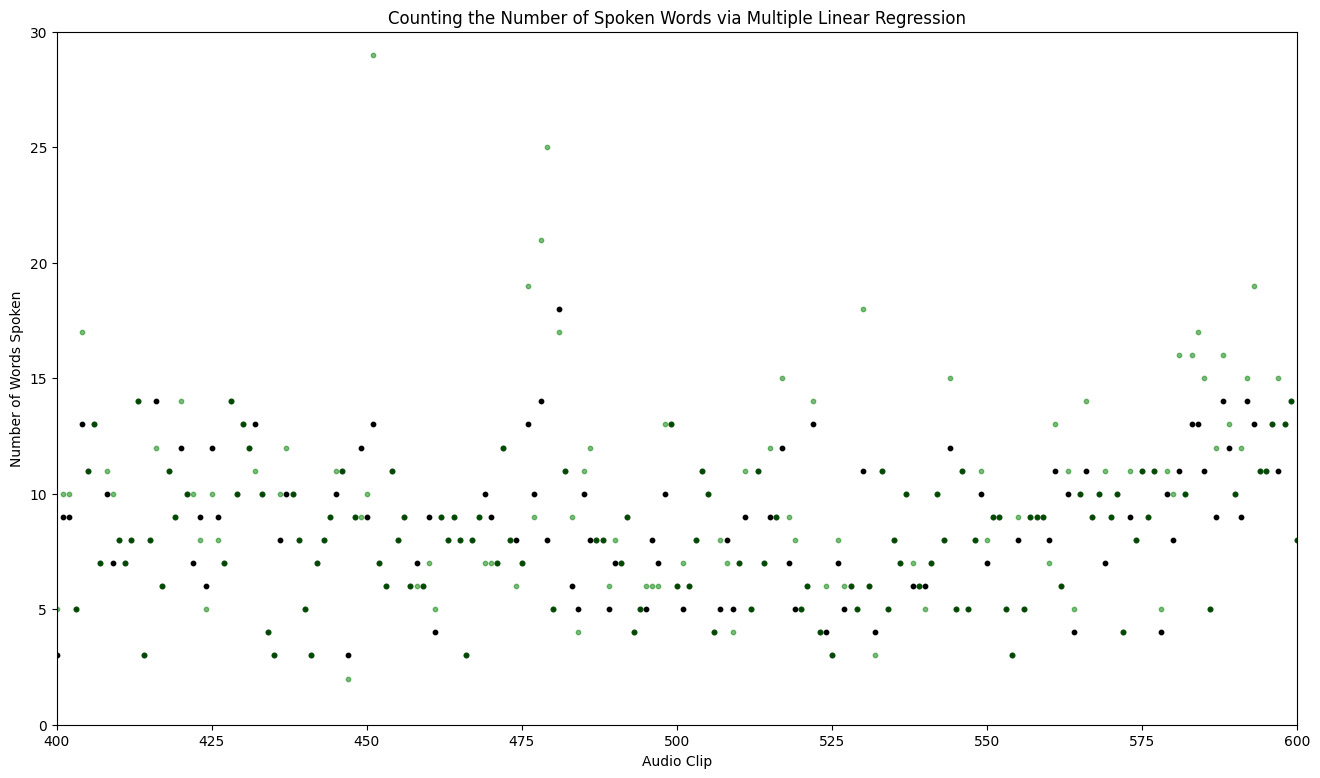

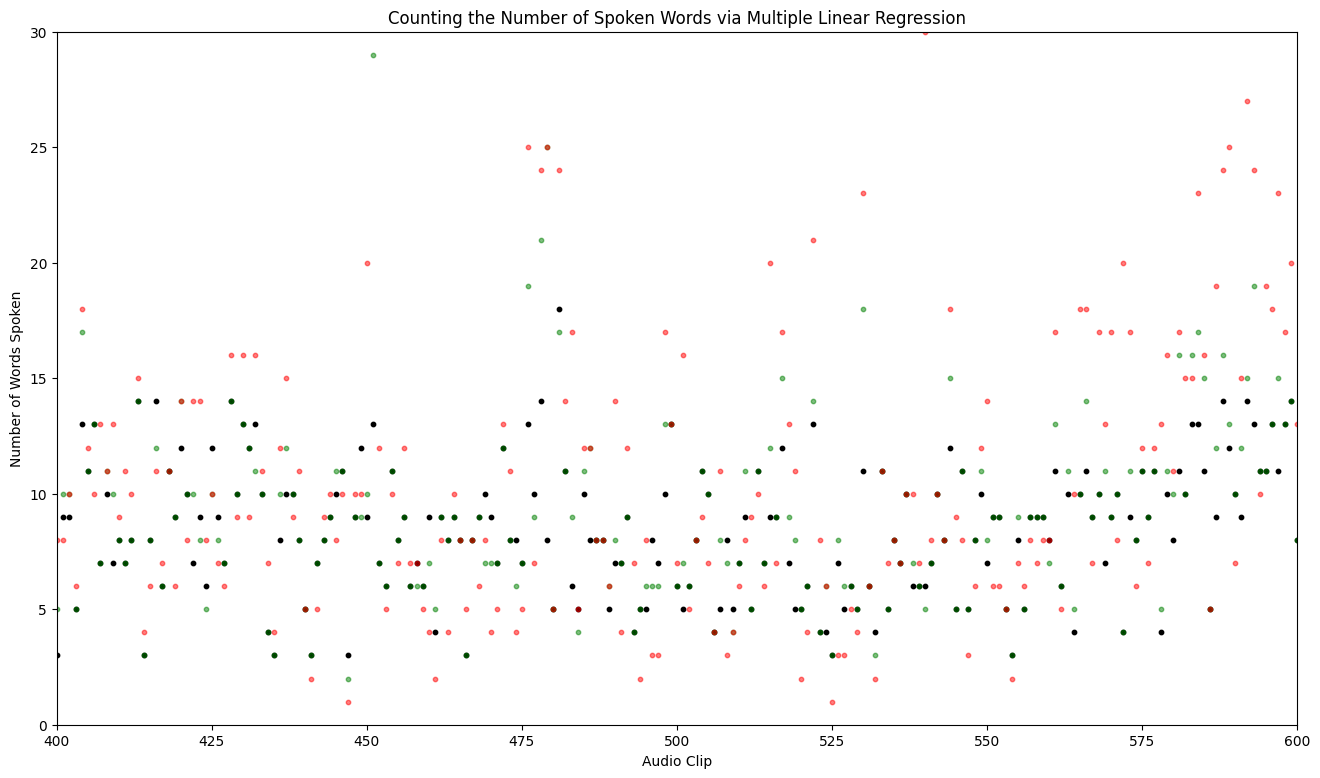

In [22]:
plt.scatter(list(range(2000)), TR_df.loc[:,'num_words'], color='k', s=10, marker='o', alpha=1)

plt.xlabel('Audio Clip')
plt.ylabel('Number of Words Spoken')
plt.title('The True Numbers of Spoken Words')
plt.axis([400, 600, 0, 30])
plt.rcParams["figure.figsize"] = my_figsize
plt.show()


plt.scatter(list(range(2000)), TR_df.loc[:,'num_words'], color='k', s=10, marker='o', alpha=1)
plt.scatter(list(range(2000)), TR_df.loc[:,'count_15_n-2_15'], color='r', s=10, marker='o', alpha=.5)

plt.xlabel('Audio Clip')
plt.ylabel('Number of Words Spoken')
plt.title('Counting the Number of Spoken Words with Fixed Silence Length, Silence Threshold, Normalization Volume')
plt.axis([400, 600, 0, 30])
plt.rcParams["figure.figsize"] = my_figsize
plt.show()



plt.scatter(list(range(2000)), TR_df.loc[:,'num_words'], color='k', s=10, marker='o', alpha=1)
plt.scatter(list(range(2000)), TR_df.loc[:,'count_pred_func'], color='g', s=10, marker='o', alpha=.5)

plt.xlabel('Audio Clip')
plt.ylabel('Number of Words Spoken')
plt.title('Counting the Number of Spoken Words via Multiple Linear Regression')
plt.axis([400, 600, 0, 30])
plt.rcParams["figure.figsize"] = my_figsize
plt.show()



plt.scatter(list(range(2000)), TR_df.loc[:,'num_words'], color='k', s=10, marker='o', alpha=1)
plt.scatter(list(range(2000)), TR_df.loc[:,'count_pred_func'], color='g', s=10, marker='o', alpha=.5)
plt.scatter(list(range(2000)), TR_df.loc[:,'count_15_n-2_15'], color='r', s=10, marker='o', alpha=.5)

plt.xlabel('Audio Clip')
plt.ylabel('Number of Words Spoken')
plt.title('Counting the Number of Spoken Words via Multiple Linear Regression')
plt.axis([400, 600, 0, 30])
plt.rcParams["figure.figsize"] = my_figsize
plt.show()